# Demo on the Infection dataset

This notebook contains visualizations of GAtt scores on the infection dataset.

In [1]:
import os

# Set proper working directory
os.chdir("/workspace/")

### Visualizations

- Visualize the GAtt scores on the infection dataset
- In the infection dataset, nodes with a unique ground truth explanation are recommended to be inspected [1]
- List of such nodes can be found in `data.unique_solution_nodes`.

[1] Faber et al,. When comparing to ground truth is wrong: On evaluating GNN explanation methods. KDD 2021.

First import necessary libraries:

In [2]:
import torch
from gatt import get_gatt, get_avgatt
from vis_utils import (
    draw_local_comp_graph_with_ground_truth_path_Infection,
    draw_local_comp_graph_with_attribution_score_Infection,
)

## 2-layer GAT
### Data and Model Preparation

In [3]:
dataset_name = "infection"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_l2 = torch.load(f"/workspace/Data/Infection_50002d_demo.pt", map_location=device)
model_l2 = torch.load(
    f"/workspace/Models/GAT_{dataset_name}_2L1H_demo.pt", map_location=device
)
model_l2.eval()

num_hops_l2 = 2

#### Ground Truth Explanation

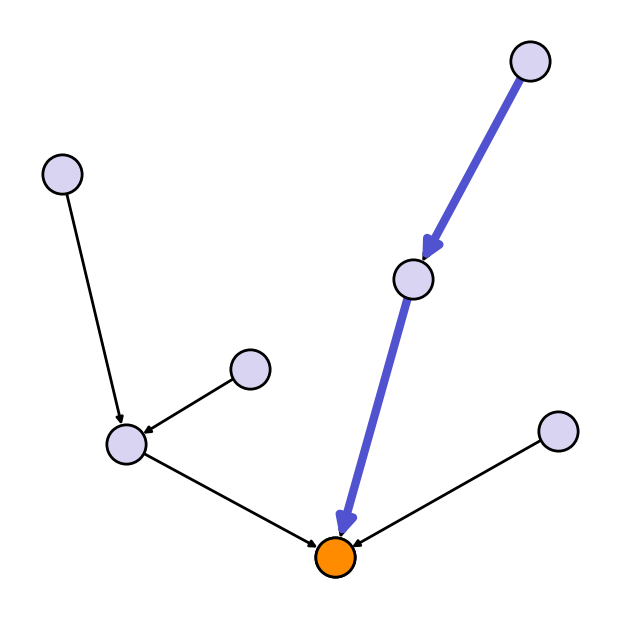

In [4]:
target_node_l2 = 2
gatt_val_l2, edge_index_l2 = get_gatt(
    target_node=target_node_l2, model=model_l2, data=data_l2, sparse=True
)
edge_index_l2 = torch.Tensor(edge_index_l2).long().t()
att_matrix_l2 = torch.zeros((data_l2.num_nodes, data_l2.num_nodes)).to(device)
att_matrix_l2[edge_index_l2[1], edge_index_l2[0]] = torch.tensor(gatt_val_l2).to(device)


draw_local_comp_graph_with_ground_truth_path_Infection(
    data=data_l2,
    hops=num_hops_l2,
    target_idx=target_node_l2,
    ground_truth=True,
)

#### GAtt scores for target node as heatmap (2 layer GAT)

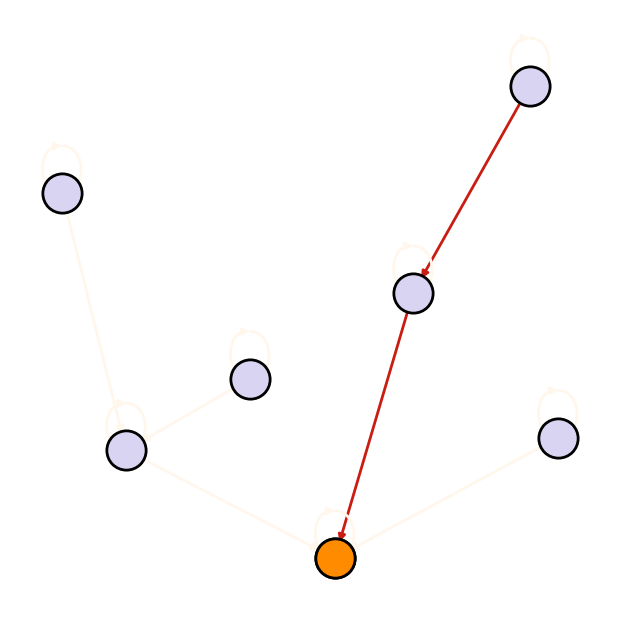

In [5]:
draw_local_comp_graph_with_attribution_score_Infection(
    data=data_l2,
    hops=num_hops_l2,
    target_idx=target_node_l2,
    att_matrix=att_matrix_l2,
)

#### AvgAtt scores (naive averaging) for target node as heatmap (2 layer GAT)

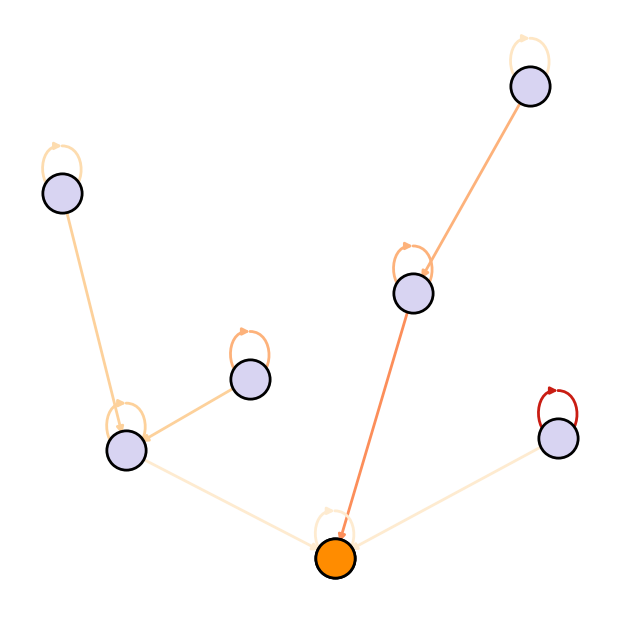

In [6]:
avgatt_value_l2, edges_in_k_hop = get_avgatt(
    target_node=target_node_l2, model=model_l2, data=data_l2, sparse=True
)
avgatt_matrix_l2 = torch.zeros((data_l2.num_nodes, data_l2.num_nodes)).to(device)
edge_index_l2 = torch.Tensor(edges_in_k_hop).long().t()
avgatt_matrix_l2[edge_index_l2[1], edge_index_l2[0]] = torch.tensor(avgatt_value_l2).to(
    device
)

draw_local_comp_graph_with_attribution_score_Infection(
    data=data_l2,
    hops=num_hops_l2,
    target_idx=target_node_l2,
    att_matrix=avgatt_matrix_l2,
)

## 3-layer GAT
### Data and Model Preparation

In [7]:
data_l3 = torch.load(f"/workspace/Data/Infection_50003d_demo.pt", map_location=device)
model_l3 = torch.load(
    f"/workspace/Models/GAT_{dataset_name}_3L1H_demo.pt", map_location=device
)
model_l3.eval()
num_hops_l3 = 3

#### Ground Truth Explanation

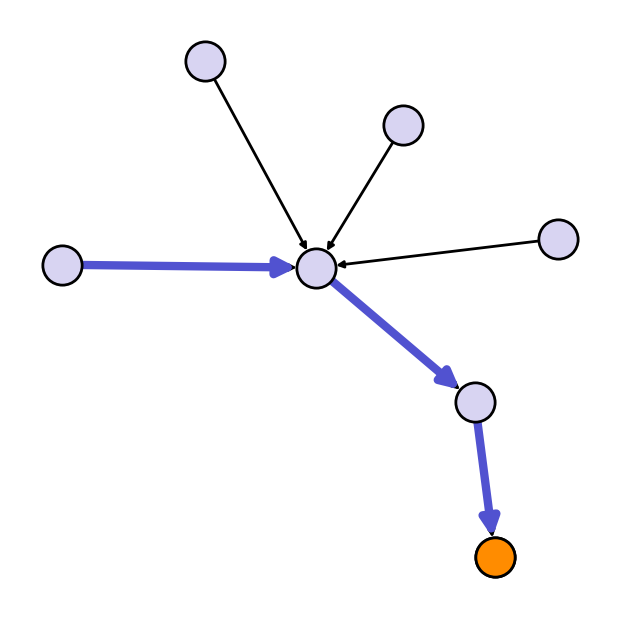

In [8]:
target_node_l3 = 385
gat_val_l3, edge_index_l3 = get_gatt(
    target_node=target_node_l3, model=model_l3, data=data_l3, sparse=True
)
edge_index_l3 = torch.Tensor(edge_index_l3).long().t()
att_matrix_l3 = torch.zeros((data_l3.num_nodes, data_l3.num_nodes)).to(device)
att_matrix_l3[edge_index_l3[1], edge_index_l3[0]] = torch.tensor(gat_val_l3).to(device)

draw_local_comp_graph_with_ground_truth_path_Infection(
    data=data_l3,
    hops=num_hops_l3,
    target_idx=target_node_l3,
    ground_truth=True,
)

#### GAtt scores for target node as heatmap (3 layer GAT)

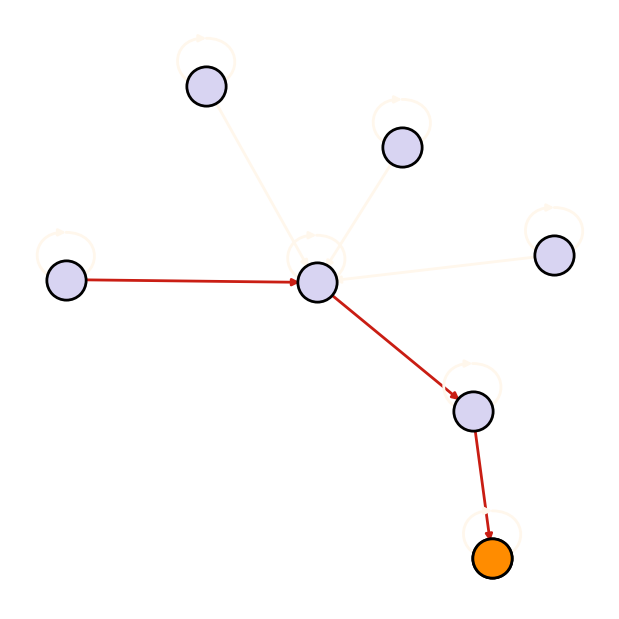

In [9]:
draw_local_comp_graph_with_attribution_score_Infection(
    data=data_l3,
    hops=num_hops_l3,
    target_idx=target_node_l3,
    att_matrix=att_matrix_l3,
)

#### AvgAtt scores (naive averaging) for target node as heatmap (3 layer GAT)

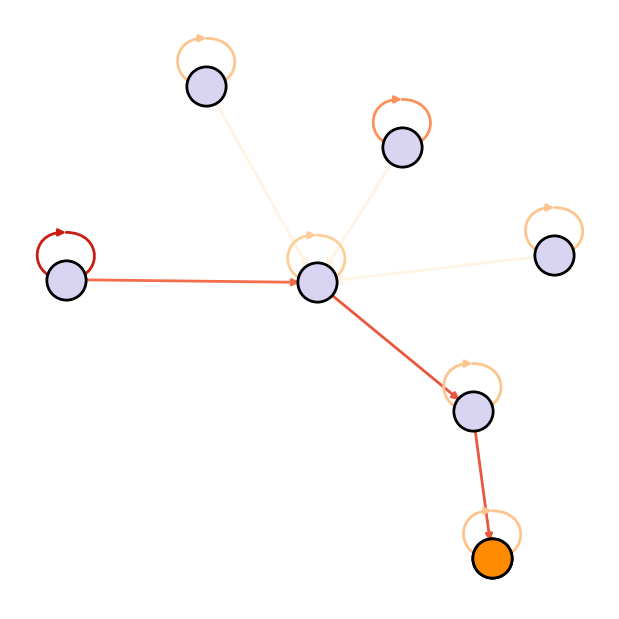

In [10]:
avgatt_value_l3, edges_in_k_hop = get_avgatt(
    target_node=target_node_l3, model=model_l3, data=data_l3, sparse=True
)
avgatt_matrix_l3 = torch.zeros((data_l3.num_nodes, data_l3.num_nodes)).to(device)
edge_index_l3 = torch.Tensor(edges_in_k_hop).long().t()
avgatt_matrix_l3[edge_index_l3[1], edge_index_l3[0]] = torch.tensor(avgatt_value_l3).to(
    device
)

draw_local_comp_graph_with_attribution_score_Infection(
    data=data_l3,
    hops=num_hops_l3,
    target_idx=target_node_l3,
    att_matrix=avgatt_matrix_l3,
)